# Evaluation Project - 8
## Flight Price Prediction
## Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

### Size of training set: 10683 records

### Size of test set: 2671 records

## FEATURES:

 Airline: The name of the airline.

 Date_of_Journey: The date of the journey

 Source: The source from which the service begins.

 Destination: The destination where the service ends.

 Route: The route taken by the flight to reach the destination.

 Dep_Time: The time when the journey starts from the source.

 Arrival_Time: Time of arrival at the destination.

 Duration: Total duration of the flight.

 Total_Stops: Total stops between the source and destination.

 Additional_Info: Additional information about the flight

 Price: The price of the ticket



# Importing requried Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
import pickle as pkl
import os


In [4]:
os.chdir("C:\github_repo\Files\Flight_Ticket_Participant_Datasets")
df1= pd.read_excel('Data_Train.xlsx')
df2= pd.read_excel('Test_set.xlsx')
df = pd.concat([df1,df2]).reset_index(drop=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
display(df.tail())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13353,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [5]:
# checking the total rows and total columns
df.shape

(13354, 11)

In [6]:
df['Airline'].nunique()

12

In [8]:
df.dtypes

Airline            object 
Date_of_Journey    object 
Source             object 
Destination        object 
Route              object 
Dep_Time           object 
Arrival_Time       object 
Duration           object 
Total_Stops        object 
Additional_Info    object 
Price              float64
dtype: object

In [9]:
df['Date'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y')
df['Weekday'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
df['Duration'] = df['Duration'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df['Flight_Charting'] = df['Source'] + ' to ' + df['Destination']
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Day'] = df['Date_of_Journey'].str.split('/').str[0]

In [10]:
df3 = df.drop(['Date_of_Journey','Source','Arrival_Time','Destination','Dep_Time','Route','Date'],axis=1)

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Duration         13354 non-null  int64  
 2   Total_Stops      13353 non-null  object 
 3   Additional_Info  13354 non-null  object 
 4   Price            10683 non-null  float64
 5   Weekday          13354 non-null  object 
 6   Month            13354 non-null  object 
 7   Flight_Charting  13354 non-null  object 
 8   Arrival_Hour     13354 non-null  object 
 9   Dep_Hour         13354 non-null  object 
 10  Day              13354 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.1+ MB


In [12]:
[i for i in df3.columns if df3[i].isnull().sum()>0]

['Total_Stops', 'Price']

In [13]:
Missing_Data = ['Total_Stops', 'Price']

In [14]:
for i in Missing_Data:
    df3[i] = df3[i].fillna(df3[i].dropna().mode()[0])

In [15]:
#information of all colmns from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          13354 non-null  object        
 1   Date_of_Journey  13354 non-null  object        
 2   Source           13354 non-null  object        
 3   Destination      13354 non-null  object        
 4   Route            13353 non-null  object        
 5   Dep_Time         13354 non-null  object        
 6   Arrival_Time     13354 non-null  object        
 7   Duration         13354 non-null  int64         
 8   Total_Stops      13353 non-null  object        
 9   Additional_Info  13354 non-null  object        
 10  Price            10683 non-null  float64       
 11  Date             13354 non-null  datetime64[ns]
 12  Weekday          13354 non-null  object        
 13  Month            13354 non-null  object        
 14  Flight_Charting  13354 non-null  objec

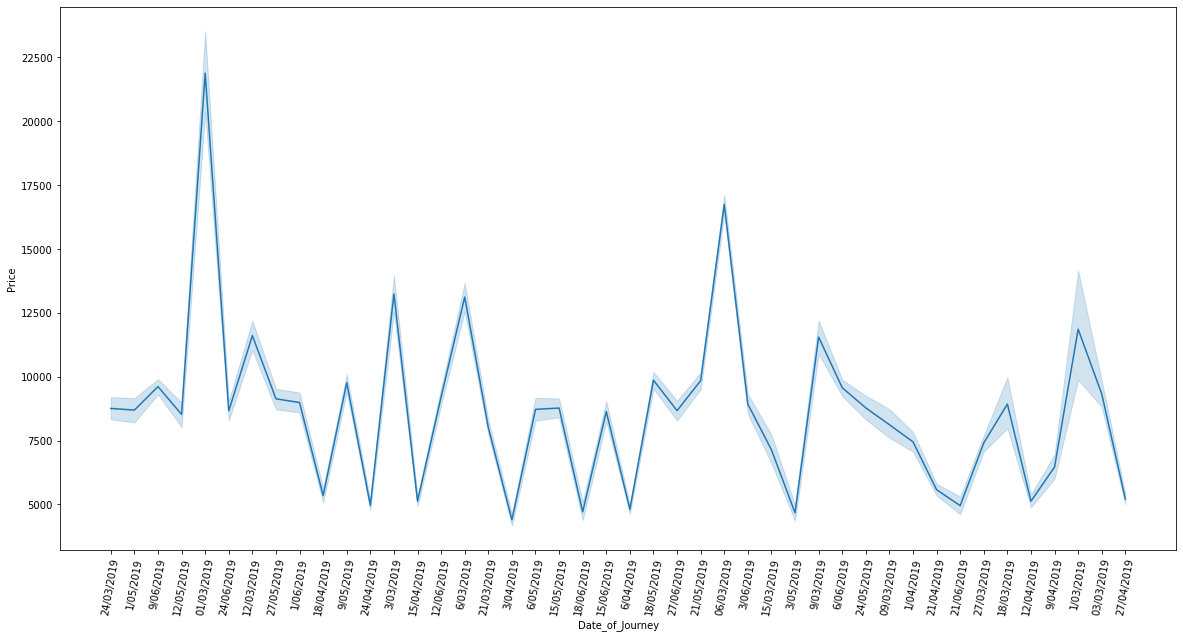

In [16]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Date_of_Journey", y="Price", data=df)
plt.xticks(rotation=80)
plt.show()

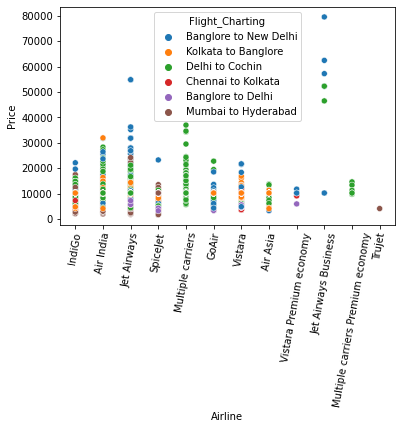

In [17]:
sns.scatterplot(x='Airline',y='Price',data=df3,hue='Flight_Charting')
plt.xticks(rotation=80)
plt.show()

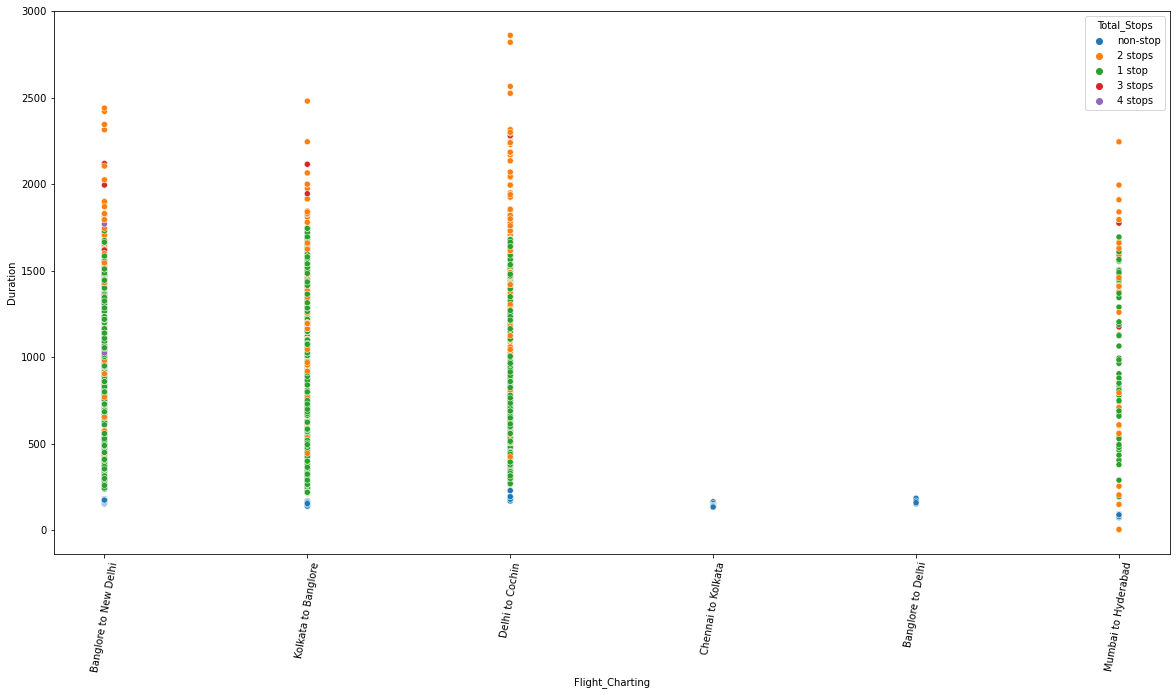

In [18]:
plt.figure(figsize=(20,10))
sns.scatterplot(y='Duration',x='Flight_Charting',data=df3,hue ='Total_Stops' )
plt.xticks(rotation=80)
plt.show()

<Figure size 1440x720 with 0 Axes>

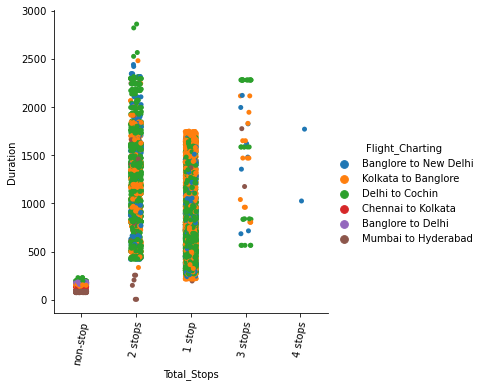

In [19]:
plt.figure(figsize=(20,10))
sns.catplot(x='Total_Stops',y='Duration',data=df3 ,hue='Flight_Charting')
plt.xticks(rotation=80)
plt.show()


<Figure size 1080x432 with 0 Axes>

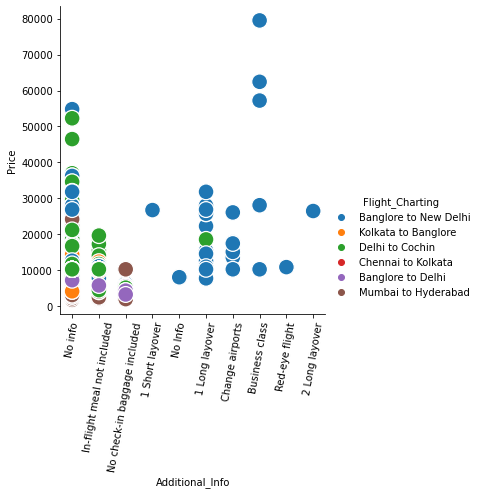

In [20]:
plt.figure(figsize=(15,6))
sns.relplot(x='Additional_Info',y='Price',data=df3,hue= 'Flight_Charting',s=250)
plt.xticks(rotation=80)
plt.show()

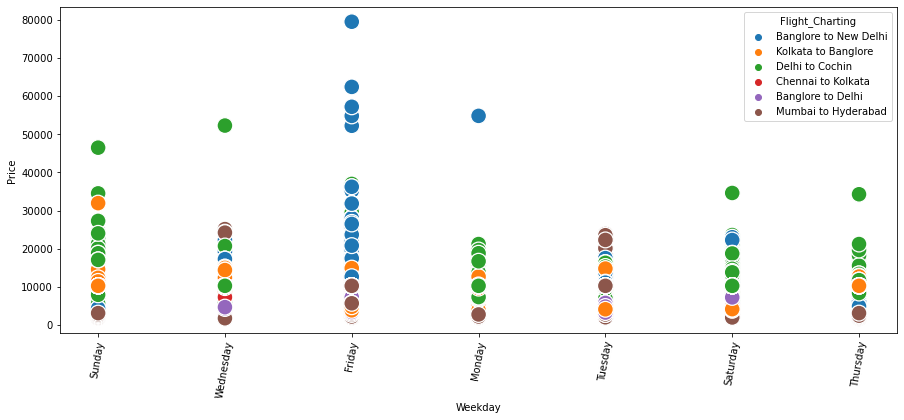

In [21]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Weekday',y='Price',data=df3,hue= 'Flight_Charting',s=250)
plt.xticks(rotation=80)
plt.show()

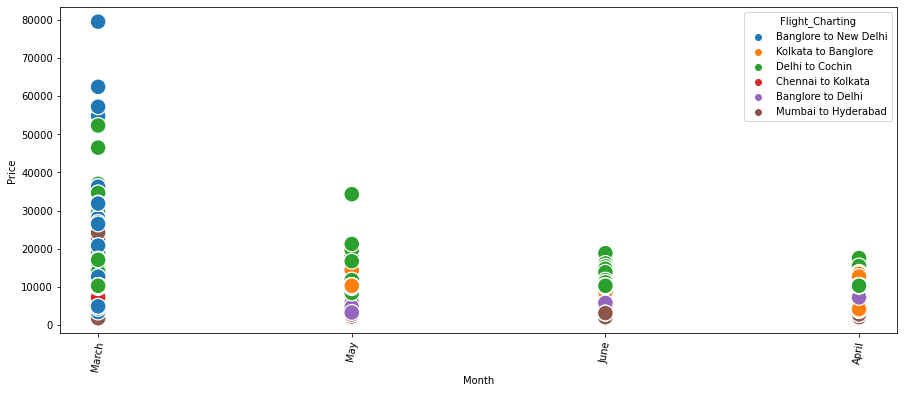

In [22]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Month',y='Price',data=df3,hue= 'Flight_Charting',s=250)
plt.xticks(rotation=80)
plt.show()

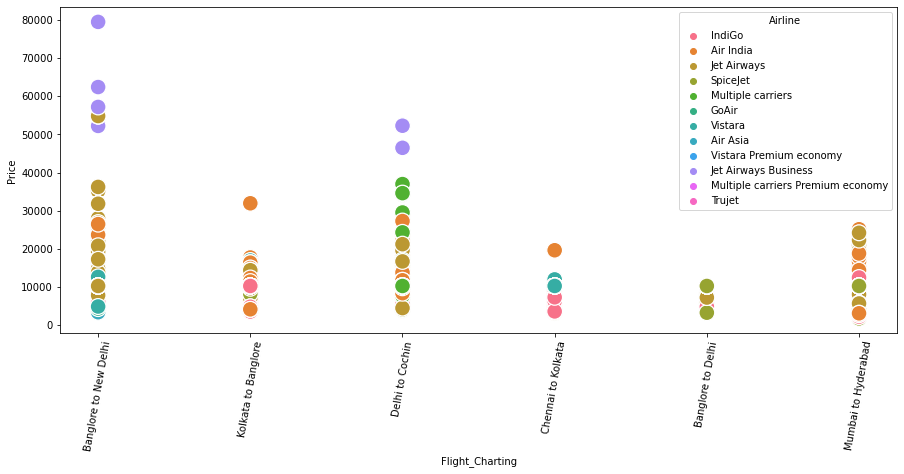

In [23]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Flight_Charting',y='Price',data=df3,hue= 'Airline',s=250)
plt.xticks(rotation=80)
plt.show()

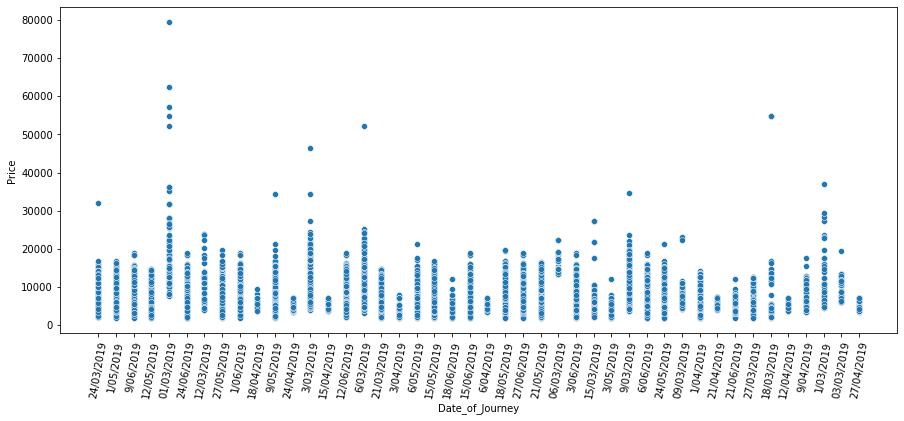

In [24]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Date_of_Journey',y='Price',data=df1)
plt.xticks(rotation=80)
plt.show()


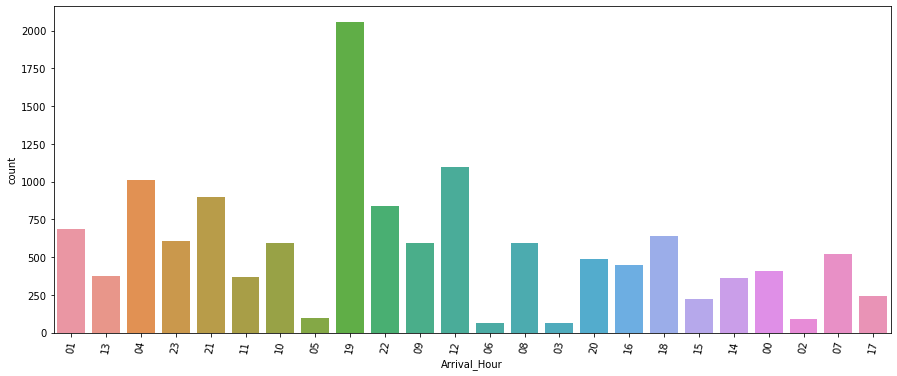

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(x='Arrival_Hour',data=df3)
plt.xticks(rotation=80)
plt.show()


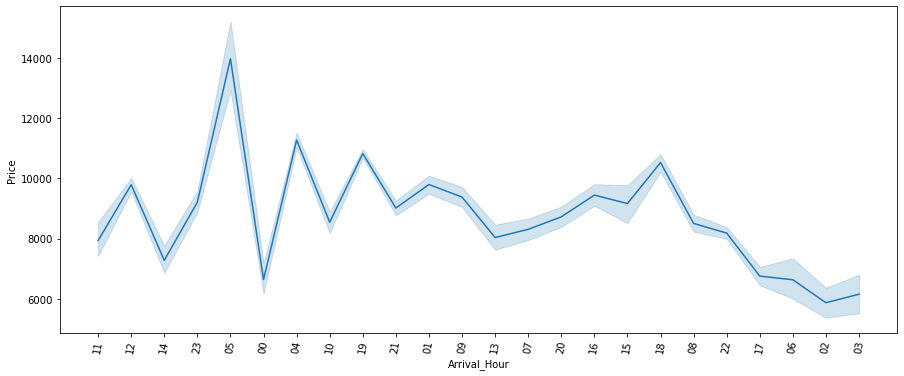

In [26]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Arrival_Hour',y='Price',data=df3.sort_values("Price", ascending = False),)
plt.xticks(rotation=80)
plt.show()


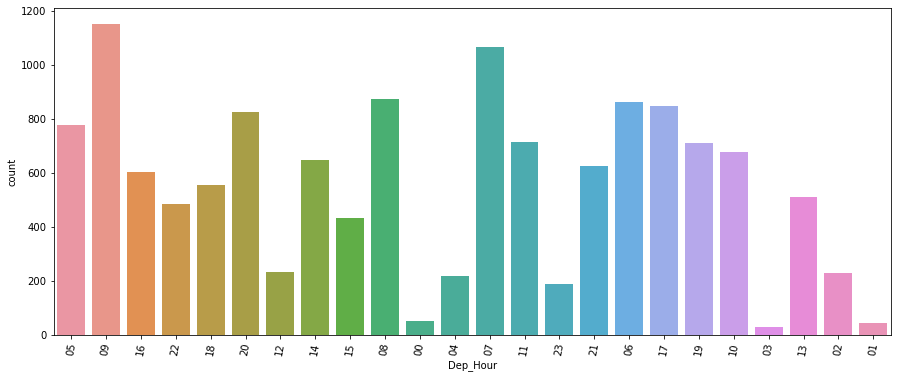

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(x='Dep_Hour',data=df3.sort_values("Price", ascending = False))
plt.xticks(rotation=80)
plt.show()


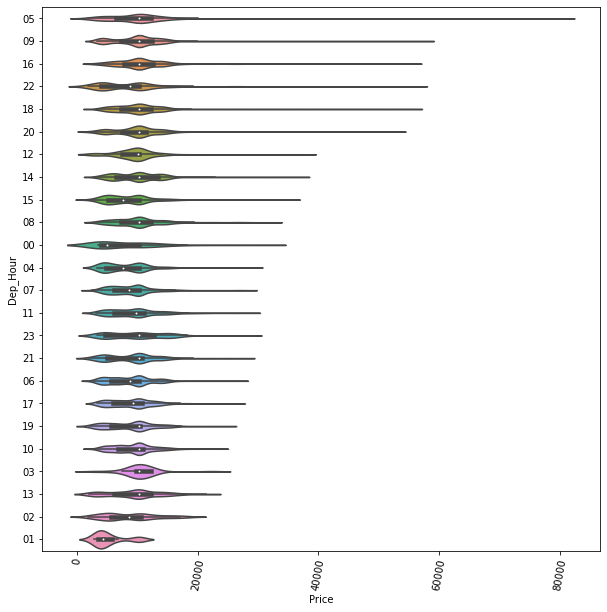

In [28]:
plt.figure(figsize=(10,10))
sns.violinplot(y='Dep_Hour',x='Price',data=df3.sort_values("Price", ascending = False),)
plt.xticks(rotation=80)
plt.show()


In [29]:
df3.groupby('Dep_Hour')['Price'].mean()

Dep_Hour
00    8185.980392 
01    5294.431818 
02    8694.662281 
03    10432.100000
04    7925.374429 
05    9791.864691 
06    8711.657010 
07    8827.112465 
08    10119.181193
09    9768.857639 
10    9205.636632 
11    9472.441176 
12    9486.758621 
13    9284.418787 
14    9974.256569 
15    8356.445476 
16    10307.683775
17    9010.613932 
18    10080.405063
19    8842.760563 
20    9795.876513 
21    8840.094400 
22    8348.026749 
23    9590.544974 
Name: Price, dtype: float64

In [30]:
df3.groupby('Arrival_Hour')['Price'].mean()

Arrival_Hour
00    6642.788321 
01    9797.251453 
02    5873.967391 
03    6157.311475 
04    11274.368213
05    13971.915789
06    6636.156250 
07    8310.424710 
08    8505.813131 
09    9381.079526 
10    8546.209106 
11    7938.219178 
12    9790.508676 
13    8037.677419 
14    7280.394444 
15    9166.238739 
16    9446.287305 
17    6756.623967 
18    10526.392187
19    10823.824988
20    8724.372188 
21    9017.459911 
22    8184.989247 
23    9212.532895 
Name: Price, dtype: float64

In [31]:
df3.select_dtypes(exclude=['int']).columns

Index(['Airline', 'Total_Stops', 'Additional_Info', 'Price', 'Weekday',
       'Month', 'Flight_Charting', 'Arrival_Hour', 'Dep_Hour', 'Day'],
      dtype='object')

In [33]:
#checking the categorical columns
category = ['Airline', 'Total_Stops', 'Additional_Info', 'Price', 'Weekday',
       'Month', 'Flight_Charting', 'Arrival_Hour', 'Dep_Hour', 'Day']
lab = LabelEncoder()
for i in category:
    df3[i] = lab.fit_transform(df3[i])

print(df3.dtypes)


Airline            int64
Duration           int64
Total_Stops        int64
Additional_Info    int64
Price              int64
Weekday            int64
Month              int64
Flight_Charting    int64
Arrival_Hour       int64
Dep_Hour           int64
Day                int64
dtype: object


In [34]:
# checking corellation
df3.corr()


,Airline,Duration,Total_Stops,Additional_Info,Price,Weekday,Month,Flight_Charting,Arrival_Hour,Dep_Hour,Day
Airline,1.000000,-0.163077,0.038243,-0.058533,-0.035836,0.005871,-0.008276,-0.023832,-0.007831,-0.026127,0.023608
Duration,-0.163077,1.000000,-0.599907,-0.165308,0.525617,0.091414,0.122393,0.212950,0.050745,-0.002450,0.019444
Total_Stops,0.038243,-0.599907,1.000000,0.162039,-0.576011,-0.123669,-0.143691,-0.307643,-0.096015,0.045760,-0.036435
Additional_Info,-0.058533,-0.165308,0.162039,1.000000,-0.065211,0.021958,-0.027771,-0.027342,0.022070,-0.054881,0.019316
Price,-0.035836,0.525617,-0.576011,-0.065211,1.000000,0.050610,0.167667,0.137252,0.040570,0.010317,-0.017686
Weekday,0.005871,0.091414,-0.123669,0.021958,0.050610,1.000000,0.052950,0.091046,0.009510,-0.016068,0.017769
Month,-0.008276,0.122393,-0.143691,-0.027771,0.167667,0.052950,1.000000,0.136159,0.015897,0.014422,-0.010675
Flight_Charting,-0.023832,0.212950,-0.307643,-0.027342,0.137252,0.091046,0.136159,1.000000,0.024497,0.046057,0.151704
Arrival_Hour,-0.007831,0.050745,-0.096015,0.022070,0.040570,0.009510,0.015897,0.024497,1.000000,0.004296,-0.009550
Dep_Hour,-0.026127,-0.002450,0.045760,-0.054881,0.010317,-0.016068,0.014422,0.046057,0.004296,1.000000,-0.007236


<AxesSubplot:>

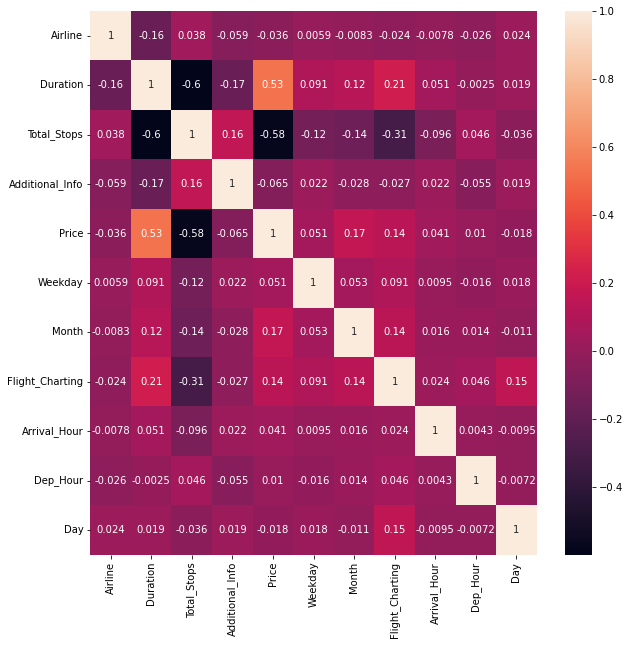

In [35]:
# checking the  null values
plt.figure(figsize=(10,10))
sns.heatmap(df3.corr(),annot=True)


In [36]:
Columns = ['Airline', 'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Weekday', 'Month', 'Flight_Charting', 'Arrival_Hour', 'Dep_Hour',
       'Day']


In [37]:
for i in Columns:
    Q1,Q3 = np.percentile(df3[i] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df_no_outliers = df3[(df3[i] < lower_range) | (df3[i] > upper_range)]

In [38]:
z = np.abs(zscore(df3))
threshold = 3
print(np.where(z<3))
print(df3.shape)

(array([    0,     0,     0, ..., 13353, 13353, 13353], dtype=int64), array([ 0,  1,  2, ...,  8,  9, 10], dtype=int64))
(13354, 11)


# OUTLIERS

In [39]:
df_new = df3[(z<3).all(axis = 1)]
df_new.shape


(13243, 11)

In [40]:
df_no_outliers


,Airline,Duration,Total_Stops,Additional_Info,Price,Weekday,Month,Flight_Charting,Arrival_Hour,Dep_Hour,Day


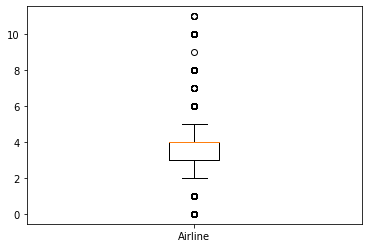

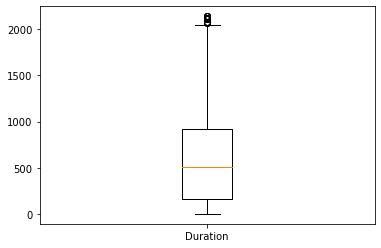

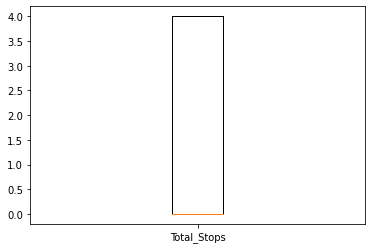

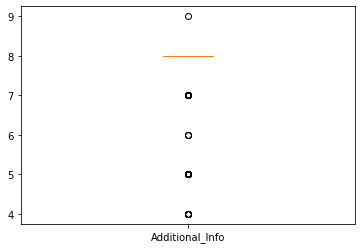

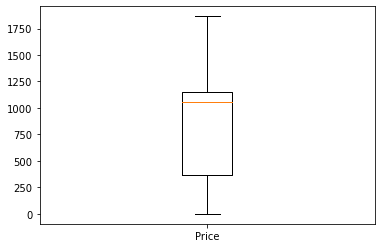

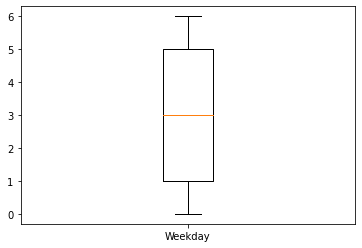

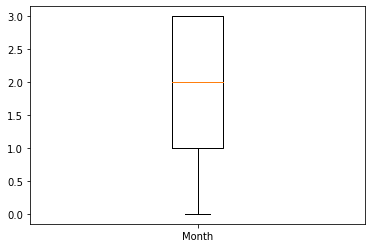

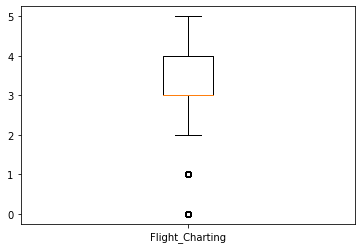

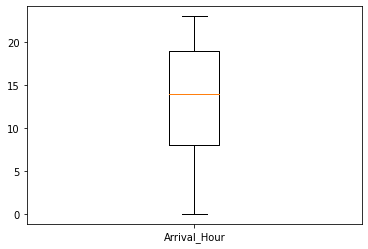

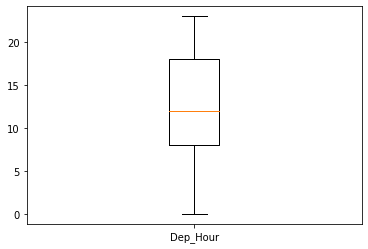

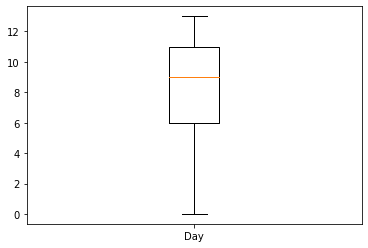

In [41]:
for i in Columns:
    plt.boxplot(df_new[i], labels = [i])
    plt.show()


# SKEWNESS

In [42]:
df.skew()

Duration        0.867883
Price           1.812552
Arrival_Hour   -0.384591
Dep_Hour        0.109087
Day             0.135142
dtype: float64

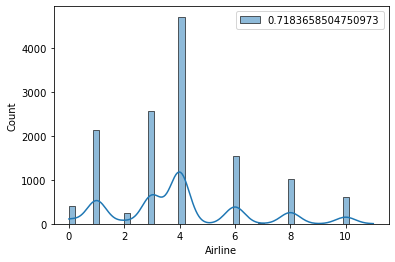

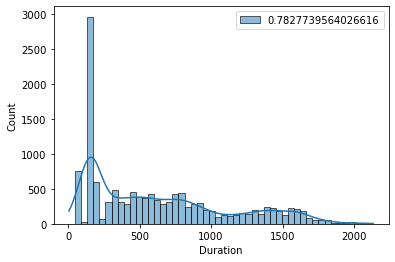

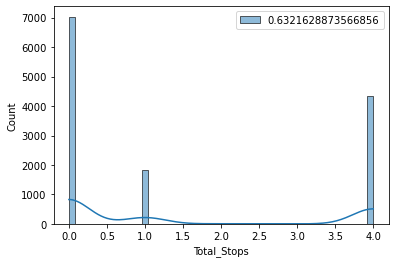

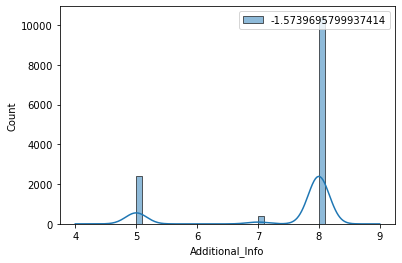

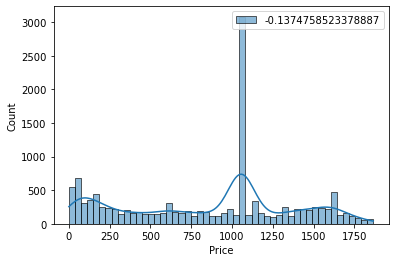

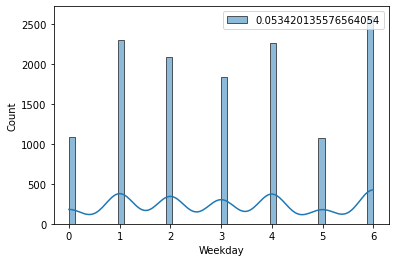

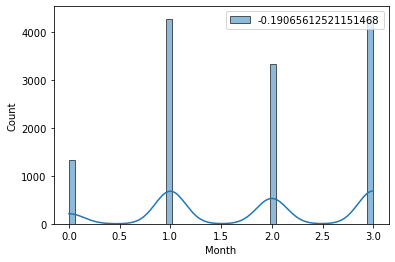

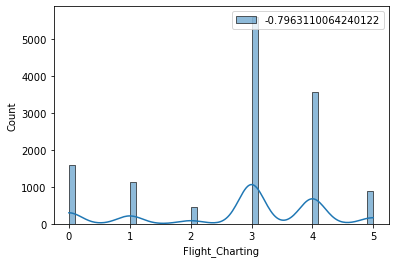

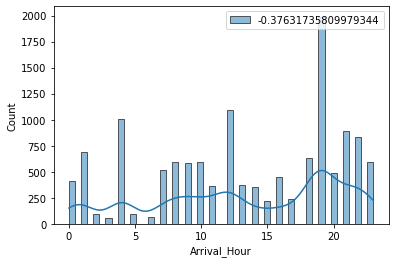

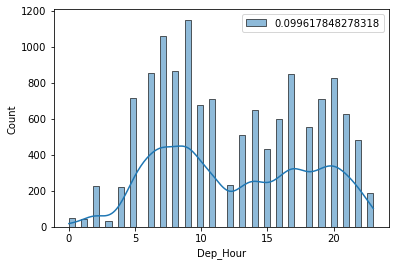

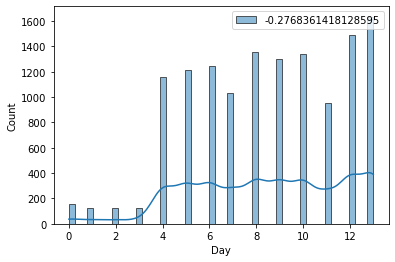

In [43]:
for i in Columns:
    sns.histplot(df_new[i], kde = True, bins = 50, label = df_new[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()


OBSERVATION

Distribution plot we can see the skewness details present in our numerical data

In [44]:
df3.columns


Index(['Airline', 'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Weekday', 'Month', 'Flight_Charting', 'Arrival_Hour', 'Dep_Hour',
       'Day'],
      dtype='object')

In [45]:
X = df_new.drop(['Price'],axis=1).iloc[:10683]
y = df_new['Price'].iloc[:10683]


In [46]:
from sklearn.preprocessing import StandardScaler


In [47]:
for i in X.columns:
    scaler = StandardScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))


In [48]:
for i in X.columns:
    scaler = StandardScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))


In [49]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)


R2 score for the random state is 42 is 0.5026517035198756
R2 score for the random state is 42 is 0.8199915685093373
R2 score for the random state is 42 is 0.6417989439053697
R2 score for the random state is 42 is 0.7905256449693668
R2 score for the random state is 42 is 0.7417794399988613
R2 score for the random state is 42 is 0.8870867031179621
R2 score for the random state is 42 is 0.8911871068279026
R2 score for the random state is 43 is 0.49808769282726606
R2 score for the random state is 43 is 0.82172603917803
R2 score for the random state is 43 is 0.6432496520440689
R2 score for the random state is 43 is 0.8152260600311017
R2 score for the random state is 43 is 0.7323213631980696
R2 score for the random state is 43 is 0.8855275530311134
R2 score for the random state is 43 is 0.8887620196424232
R2 score for the random state is 44 is 0.5109190673432837
R2 score for the random state is 44 is 0.8268187372131366
R2 score for the random state is 44 is 0.6469548387238646
R2 score for th

In [50]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]


In [51]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [52]:
RFR=RandomForestRegressor()
RandomizedSearch_RFR=RandomizedSearchCV(estimator=RFR,param_distributions=param_grid,n_iter=100,cv=3,verbose=2,
                               random_state=74,n_jobs=-1)
RandomizedSearch_RFR.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=74, verbose=2)

In [53]:
RandomizedSearch_RFR.best_params_


{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 450}

In [54]:
RandomizedSearch_RFR.best_estimator_


RandomForestRegressor(max_depth=450, max_features='auto', min_samples_split=5,
                      n_estimators=800)

In [55]:
RFR = RandomForestRegressor(n_estimators=800,min_samples_split=5,min_samples_leaf=1,max_features='auto',max_depth=450,random_state=74)
RFR.fit(X_train,y_train)
pred = RFR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 90.44933694921454


In [56]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  104.0061826878119
Mean squared Error:  31161.776042431975
Root Mean Absolute Error:  10.198342153890106


Text(0, 0.5, 'Predicted_Y')

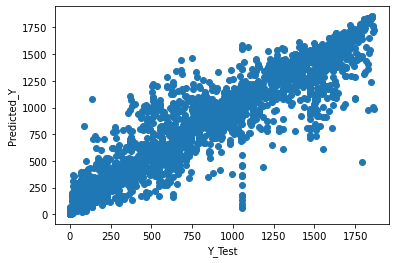

In [57]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

<AxesSubplot:>

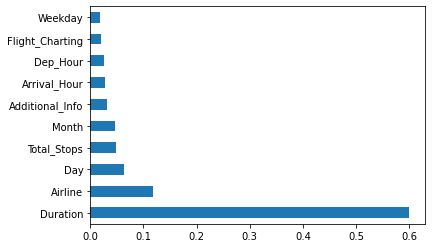

In [58]:
feat_importances = pd.Series(RFR.feature_importances_, index=X_train.columns)
feat_importances.nlargest(11).plot(kind='barh')


In [59]:
from sklearn.pipeline import Pipeline,make_pipeline
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=5)),
                     ('lr_classifier',LinearRegression())])

In [60]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=5)),
                     ('rf_classifier',RandomForestRegressor())])


In [61]:
pipelines = [pipeline_lr, pipeline_dt]

In [62]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [63]:
pipe_dict = {0: 'Linear Regression',1:'RandomForest'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [64]:
pred = pipe.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 66.35970683742565


# MACHINE LEARNING

## FINDING BEST RANDOM STATE

In [65]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [66]:
classification_model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size = 0.33)
    for j in classification_model:
        j.fit(X_train,y_train)
        pred_c = j.predict(X_test)
        ac_score = accuracy_score(y_test,pred_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model_classification = j
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model_classification)

accuracy score correspond to random state  40 is 0.4906409529211571
accuracy score correspond to random state  40 is 0.28899602949517866
accuracy score correspond to random state  41 is 0.5
accuracy score correspond to random state  41 is 0.290414066931367
accuracy score correspond to random state  42 is 0.49404424276800907
accuracy score correspond to random state  42 is 0.289563244469654
accuracy score correspond to random state  43 is 0.499149177538287
accuracy score correspond to random state  43 is 0.2833238797504254
accuracy score correspond to random state  44 is 0.4824163357912649
accuracy score correspond to random state  44 is 0.2923993193420306
accuracy score correspond to random state  45 is 0.48667044809982984
accuracy score correspond to random state  45 is 0.28701077708451506
accuracy score correspond to random state  46 is 0.4946114577424844
accuracy score correspond to random state  46 is 0.3017583664208735
accuracy score correspond to random state  47 is 0.49205899035

In [67]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}


In [68]:
dec = DecisionTreeClassifier(random_state=86)
grid_search = GridSearchCV(estimator=dec, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


In [69]:
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=86), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [70]:
grid_search.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=86)

In [71]:
grid_search.best_params_


{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

In [72]:
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=20, min_samples_leaf=5, random_state=86)
DTC.fit(X_train,y_train)
predc = DTC.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 46.001134429948955


In [73]:
tes = df3.iloc[10683:]

In [74]:
Test_data = tes.drop('Price',axis=1)

In [75]:
test_da = tes.drop(['Price'],axis=1)


In [76]:
for i in test_da.columns:
    scaler = StandardScaler()
    test_da[i] = scaler.fit_transform(test_da[i].values.reshape(-1, 1))


In [77]:
test_da.shape

(2671, 10)

In [78]:
RFR = RandomForestRegressor(n_estimators=560,min_samples_split=5,min_samples_leaf=1,max_features='auto',max_depth=560,random_state=74)
RFR.fit(X_train,y_train)
pred = RFR.predict(test_da)


In [79]:
Price = pd.DataFrame(pred).reset_index()


In [80]:
Test = pd.DataFrame(test_da).reset_index()


In [81]:
Flight_Price = pd.concat([Test,Price],axis=1)
Flight_Price


,index,Airline,Duration,Total_Stops,Additional_Info,Weekday,Month,Flight_Charting,Arrival_Hour,Dep_Hour,Day,index,0
0,10683,-0.009009,0.030389,-0.792411,0.471706,0.412824,-0.816993,0.111967,-1.361709,0.773265,1.100503,0,1605.365468
1,10684,-0.423903,-0.796151,-0.792411,0.471706,-0.098373,1.197954,0.824026,-0.509324,-1.161445,-1.041949,1,527.699024
2,10685,-0.009009,1.563970,-0.792411,-2.180771,0.924021,1.197954,0.111967,0.769252,1.125030,-0.123755,2,1374.853046
3,10686,0.820778,0.279347,-0.792411,0.471706,0.924021,1.197954,0.111967,1.053380,-0.809679,-0.123755,3,964.378898
4,10687,-1.668584,-0.935567,1.435515,0.471706,-1.120768,-0.816993,-2.024209,-1.645837,1.828561,0.182310,4,143.877778
5,10688,-0.009009,0.916680,-0.792411,-2.180771,1.435218,-0.816993,0.111967,-0.225196,0.949147,-1.041949,5,1054.056250
6,10689,-1.253690,0.528305,-0.792411,0.471706,0.924021,0.190481,-1.312150,1.195444,-0.985562,-1.041949,6,1073.181012
7,10690,-0.423903,-0.646776,-0.792411,0.471706,1.435218,1.197954,0.824026,0.911316,0.421499,-1.348014,7,308.894133
8,10691,-0.423903,-0.945526,1.435515,0.471706,-1.631965,0.190481,0.824026,-0.225196,-0.457914,-0.735884,8,178.132045
9,10692,-0.009009,-0.547193,-0.792411,0.471706,-0.609571,1.197954,0.824026,1.195444,0.597382,-0.429820,9,1365.391341


In [ ]:
..............................................................THANK YOU.........................................................................